# Nutritional data by food groups

Source: https://data.nal.usda.gov/dataset/composition-foods-raw-processed-prepared-usda-national-nutrient-database-standard-reference-release-27

## Import modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline

## Load data

**Import nutritional data from text files**

In [3]:
# Full dataset files
df_fooddes = pd.read_csv('./local_data/usda-r27/FOOD_DES.txt', header=None, delimiter='^', quotechar='~')
df_nutdata = pd.read_csv('./local_data/usda-r27/NUT_DATA.txt', header=None, delimiter='^', quotechar='~')
df_weight = pd.read_csv('./local_data/usda-r27/WEIGHT.txt', encoding='ISO-8859-1', header=None, delimiter='^', quotechar='~')
df_footnote = pd.read_csv('./local_data/usda-r27/FOOTNOTE.txt', header=None, delimiter='^', quotechar='~')
df_datsrcln = pd.read_csv('./local_data/usda-r27/DATSRCLN.txt', header=None, delimiter='^', quotechar='~')
df_langual = pd.read_csv('./local_data/usda-r27/LANGUAL.txt', header=None, delimiter='^', quotechar='~')
df_datasrc = pd.read_csv('./local_data/usda-r27/DATA_SRC.txt', header=None, delimiter='^', quotechar='~')
df_langdesc = pd.read_csv('./local_data/usda-r27/LANGDESC.txt', header=None, delimiter='^', quotechar='~')
df_nutrdef = pd.read_csv('./local_data/usda-r27/NUTR_DEF.txt', encoding='ISO-8859-1', header=None, delimiter='^', quotechar='~')
df_derivcd = pd.read_csv('./local_data/usda-r27/DERIV_CD.txt', header=None, delimiter='^', quotechar='~')
df_fdgroup = pd.read_csv('./local_data/usda-r27/FD_GROUP.txt', header=None, delimiter='^', quotechar='~')
df_srccd = pd.read_csv('./local_data/usda-r27/SRC_CD.txt', header=None, delimiter='^', quotechar='~')

# Abbreviated file
df_abbrev = pd.read_csv('./local_data/usda-r27/ABBREV.txt', header=None, delimiter='^', quotechar='~')

/Users/mmorit202/.pyenv/versions/3.6.5/envs/nutdb/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Add column names to dataframes - Sourced manually from accompanying pdf**

In [4]:
# Full dataset files
df_fooddes.columns = ['NDB_No', 'FdGrp_Cd', 'Long_Desc', 'Shrt_Desc', 'ComName', 'ManufacName', 'Survey', 
                      'Ref_desc', 'Refuse', 'SciName', 'N_Factor', 'Pro_Factor', 'Fat_Factor', 'CHO_Factor']
df_nutdata.columns = ['NDB_No', 'Nutr_No', 'Nutr_Val', 'Num_Data_Pts', 'Std_Error', 'Src_Cd', 'Deriv_Cd', 
                      'Ref_NDB_No', 'Add_Nutr_Mark', 'Num_Studies', 'Min', 'Max', 'DF', 'Low_EB', 'Up_EB', 
                      'Stat_cmt', 'AddMod_Date', 'CC']
df_weight.columns = ['NDB_No', 'Seq', 'Amount', 'Msre_Desc', 'Gm_Wgt', 'Num_Data_Pts', 'Std_Dev']
df_footnote.columns = ['NDB_No', 'Footnt_No', 'Footnt_Typ', 'Nutr_No', 'Footnt_Txt']
df_fdgroup.columns = ['FdGrp_Cd', 'FdGrp_Desc']
df_langual.columns = ['NDB_No', 'Factor_Code']
df_langdesc.columns = ['Factor_Code', 'Description']
df_nutrdef.columns = ['Nutr_No', 'Units', 'Tagname', 'NutrDesc', 'Num_Dec', 'SR_Order']
df_srccd.columns = ['Src_Cd', 'SrcCd_Desc']
df_derivcd.columns = ['Deriv_Cd', 'Deriv_Desc']
df_datasrc.columns = ['DataSrc_ID', 'Authors', 'Title', 'Year', 'Journal', 'Vol_City', 'Issue_State', 
                      'Start_Page', 'End_Page']
df_datsrcln.columns = ['NDB_No', 'Nutr_No', 'DataSrc_ID']

# Abbreviated file
df_abbrev.columns = ['NDB_No', 'Shrt_Desc', 'Water', 'Energ_Kcal', 'Protein', 'Lipid_Tot', 'Ash', 'Carbohydrt', 
                     'Fiber_TD', 'Sugar_Tot', 'Calcium', 'Iron', 'Magnesium', 'Phosphorus', 'Potassium', 'Sodium', 
                     'Zinc', 'Copper', 'Manganese', 'Selenium', 'Vit_C', 'Thiamin', 'Riboflavin', 'Niacin', 
                     'Panto_acid', 'Vit_B6', 'Folate_Tot', 'Folic_acid', 'Food_Folate', 'Folate_DFE', 'Choline_Tot', 
                     'Vit_B12', 'Vit_A_IU', 'Vit_A_RAE', 'Retinol', 'Alpha_Carot', 'Beta_Carot', 'Beta_Crypt', 
                     'Lycopene', 'LutZea', 'Vit_E', 'Vit_D_mcg', 'Vit_D_IU', 'Vit_K', 'FA_Sat', 'FA_Mono', 
                     'FA_Poly', 'Cholestrl', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2', 'GmWt_Desc2', 'Refuse_Pct']

**Join abbreviated data to food groups**

In [5]:
# Create new dataframe that is joined to food group code from main food description dataset
df_foodjoin = pd.merge(df_abbrev, df_fooddes[['NDB_No', 'FdGrp_Cd']], on='NDB_No', suffixes='_1')

# Join new dataframe to food group dataset
df_foodjoin = pd.merge(df_foodjoin, df_fdgroup, on='FdGrp_Cd', suffixes='_1')

## Explore the data

In [6]:
# Sampling of first 10 rows
df_foodjoin.head(10)

,NDB_No,Shrt_Desc,Water,Energ_Kcal,Protein,Lipid_Tot,Ash,Carbohydrt,Fiber_TD,Sugar_Tot,...,FA_Mono,FA_Poly,Cholestrl,GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,FdGrp_Cd,FdGrp_Desc
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,21.02,3.04,215.0,5.0,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0,100,Dairy and Egg Products
1,1002,"BUTTER,WHIPPED,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,23.42,3.01,219.0,3.0,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0,100,Dairy and Egg Products
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,28.73,3.69,256.0,12.0,1 tbsp,205.0,1 cup,0.0,100,Dairy and Egg Products
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,7.77,0.80,75.0,28.0,1 oz,17.0,1 cubic inch,0.0,100,Dairy and Egg Products
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,8.59,0.78,94.0,132.0,"1 cup, diced",113.0,"1 cup, shredded",0.0,100,Dairy and Egg Products
5,1006,"CHEESE,BRIE",48.42,334,20.75,27.68,2.70,0.45,0.0,0.45,...,8.01,0.82,100.0,28.0,1 oz,144.0,"1 cup, sliced",0.0,100,Dairy and Egg Products
6,1007,"CHEESE,CAMEMBERT",51.80,300,19.80,24.26,3.68,0.46,0.0,0.46,...,7.02,0.72,72.0,28.0,1 oz,246.0,1 cup,0.0,100,Dairy and Egg Products
7,1008,"CHEESE,CARAWAY",39.28,376,25.18,29.20,3.28,3.06,0.0,NaN,...,8.27,0.83,93.0,28.0,1 oz,NaN,NaN,0.0,100,Dairy and Egg Products
8,1009,"CHEESE,CHEDDAR",37.10,406,24.04,33.82,3.71,1.33,0.0,0.28,...,8.42,1.43,102.0,132.0,"1 cup, diced",244.0,"1 cup, melted",0.0,100,Dairy and Egg Products
9,1010,"CHEESE,CHESHIRE",37.65,387,23.37,30.60,3.60,4.78,0.0,NaN,...,8.67,0.87,103.0,28.0,1 oz,NaN,NaN,0.0,100,Dairy and Egg Products


In [7]:
# How many entries exist for each food group
df_foodjoin['FdGrp_Desc'].value_counts()

Beef Products                          946
Vegetables and Vegetable Products      828
Baked Products                         797
Soups, Sauces, and Gravies             452
Lamb, Veal, and Game Products          438
Poultry Products                       390
Legumes and Legume Products            389
Fast Foods                             371
Breakfast Cereals                      363
Baby Foods                             362
Sweets                                 347
Fruits and Fruit Juices                346
Pork Products                          343
Beverages                              315
Finfish and Shellfish Products         267
Dairy and Egg Products                 264
Sausages and Luncheon Meats            244
Fats and Oils                          219
Cereal Grains and Pasta                183
Snacks                                 171
American Indian/Alaska Native Foods    165
Nut and Seed Products                  133
Meals, Entrees, and Side Dishes        113
Restaurant 

## Apply transformations

**Create new columns that normalize certain nutrients by calorie**

In [8]:
df_foodjoin['Protein_percal'] = df_foodjoin[['Protein']].div(df_foodjoin.Energ_Kcal, axis=0)
df_foodjoin['Carbohydrt_percal'] = df_foodjoin[['Carbohydrt']].div(df_foodjoin.Energ_Kcal, axis=0)
df_foodjoin['Fiber_TD_percal'] = df_foodjoin[['Fiber_TD']].div(df_foodjoin.Energ_Kcal, axis=0)
df_foodjoin['Sugar_Tot_percal'] = df_foodjoin[['Sugar_Tot']].div(df_foodjoin.Energ_Kcal, axis=0)
df_foodjoin['Cholestrl_percal'] = df_foodjoin[['Cholestrl']].div(df_foodjoin.Energ_Kcal, axis=0)
df_foodjoin['Sodium_percal'] = df_foodjoin[['Sodium']].div(df_foodjoin.Energ_Kcal, axis=0)
df_foodjoin['Lipid_Tot_percal'] = df_foodjoin[['Lipid_Tot']].div(df_foodjoin.Energ_Kcal, axis=0)

**Create new columns that normalize certain nutrients by serving (household weight)**

In [9]:
# Create weight conversion factor since all nutrients are per 100g
df_foodjoin['GmWt_1_per100'] = df_foodjoin.GmWt_1.divide(100)

# Normalize to serving
df_foodjoin['Energ_Kcal_perserv'] = df_foodjoin[['Energ_Kcal']].multiply(df_foodjoin.GmWt_1_per100, axis=0)
df_foodjoin['Protein_perserv'] = df_foodjoin[['Protein']].multiply(df_foodjoin.GmWt_1_per100, axis=0)
df_foodjoin['Carbohydrt_perserv'] = df_foodjoin[['Carbohydrt']].multiply(df_foodjoin.GmWt_1_per100, axis=0)
df_foodjoin['Fiber_TD_perserv'] = df_foodjoin[['Fiber_TD']].multiply(df_foodjoin.GmWt_1_per100, axis=0)
df_foodjoin['Sugar_Tot_perserv'] = df_foodjoin[['Sugar_Tot']].multiply(df_foodjoin.GmWt_1_per100, axis=0)
df_foodjoin['Cholestrl_perserv'] = df_foodjoin[['Cholestrl']].multiply(df_foodjoin.GmWt_1_per100, axis=0)
df_foodjoin['Sodium_perserv'] = df_foodjoin[['Sodium']].multiply(df_foodjoin.GmWt_1_per100, axis=0)
df_foodjoin['Lipid_Tot_perserv'] = df_foodjoin[['Lipid_Tot']].multiply(df_foodjoin.GmWt_1_per100, axis=0)

## Analyze data

**Setup properties to be used in subsequent plots**

In [10]:
# This list defines which subset of foodgroups to explore, and will also be used to order the data
food_groups = ['Sausages and Luncheon Meats', 'Beef Products', 'Pork Products',
               'Poultry Products', 'Finfish and Shellfish Products', 'Dairy and Egg Products', 
               'Vegetables and Vegetable Products',
              'Legumes and Legume Products']

# Create a new dataframe filtered for the desired foodgroups to simplify plotting
df_foodjoin_grps = df_foodjoin[df_foodjoin.FdGrp_Desc.isin(food_groups)]

# Define plot attributes that will used in all plots
plot_attr = {'context': 'talk', 'palette': 'Set2', 'figsize': (10,8)}

# Set seaborn context that will style the plots
sns.set_context(plot_attr['context'])

**Plot distributions of nutrients by food groups**

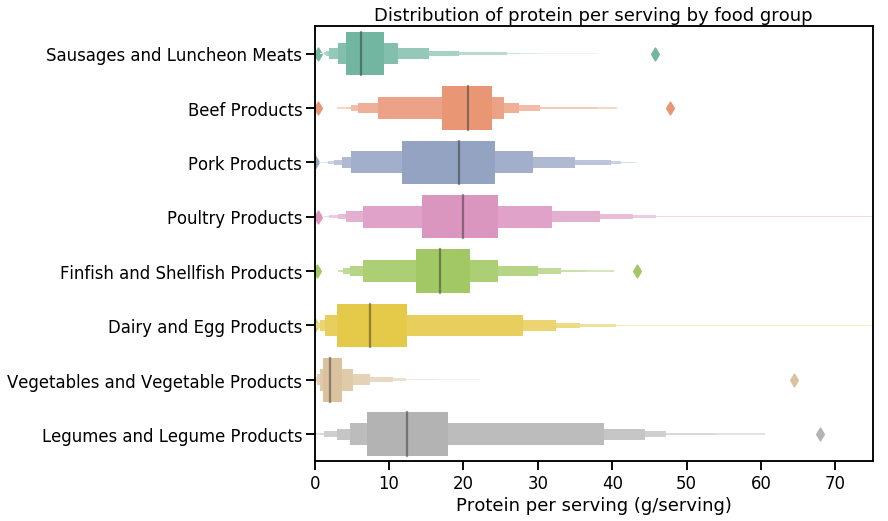

In [25]:
# Create new plot
fig, ax = plt.subplots(figsize=plot_attr['figsize'])
newplot = sns.boxenplot(y='FdGrp_Desc', x='Protein_perserv', palette=plot_attr['palette'], 
                        ax=ax, order=food_groups, data=df_foodjoin_grps)

# Modify plot attributes
newax = ax.set(ylabel='', xlabel='Protein per serving (g/serving)', xlim=(0,75),
               title='Distribution of protein per serving by food group')


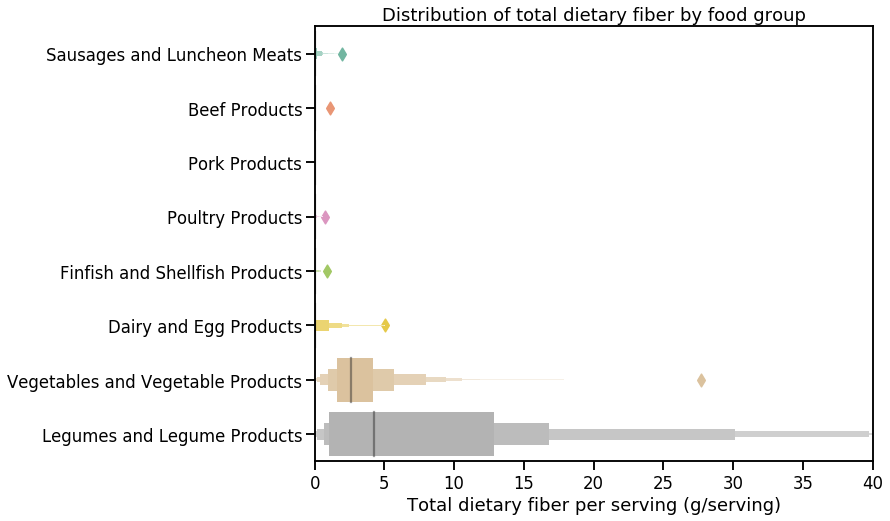

In [39]:
# Create new plot
fig, ax = plt.subplots(figsize=plot_attr['figsize'])
newplot = sns.boxenplot(y='FdGrp_Desc', x='Fiber_TD_perserv', palette=plot_attr['palette'], 
                        ax=ax, order=food_groups, data=df_foodjoin_grps)

# Modify plot attributes
newax = ax.set(ylabel='', xlabel='Total dietary fiber per serving (g/serving)', xlim=(0,40),
               title='Distribution of total dietary fiber by food group')


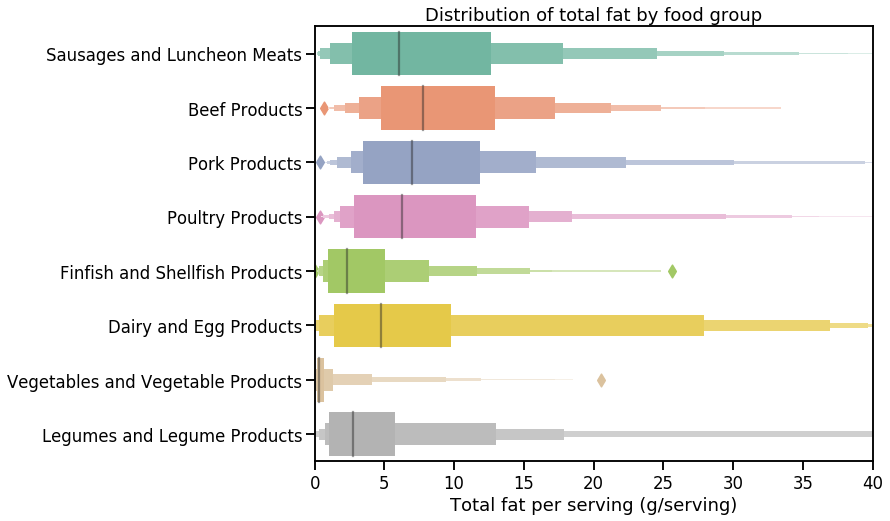

In [38]:
# Create new plot
fig, ax = plt.subplots(figsize=plot_attr['figsize'])
newplot = sns.boxenplot(y='FdGrp_Desc', x='Lipid_Tot_perserv', palette=plot_attr['palette'], 
                        ax=ax, order=food_groups, data=df_foodjoin_grps)

# Modify plot attributes
newax = ax.set(ylabel='', xlabel='Total fat per serving (g/serving)', xlim=(0,40), 
               title='Distribution of total fat by food group')


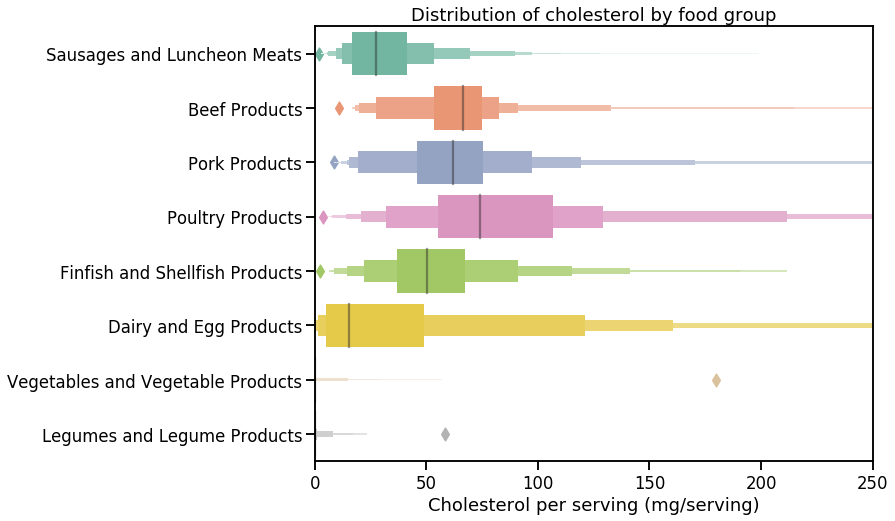

In [34]:
# Create new plot
fig, ax = plt.subplots(figsize=plot_attr['figsize'])
newplot = sns.boxenplot(y='FdGrp_Desc', x='Cholestrl_perserv', palette=plot_attr['palette'], 
                        ax=ax, order=food_groups, data=df_foodjoin_grps)

# Modify plot attributes; Manually set x-axis limits due high value outliers
newax = ax.set(ylabel='', xlabel='Cholesterol per serving (mg/serving)', xlim=(0,250),
               title='Distribution of cholesterol by food group')

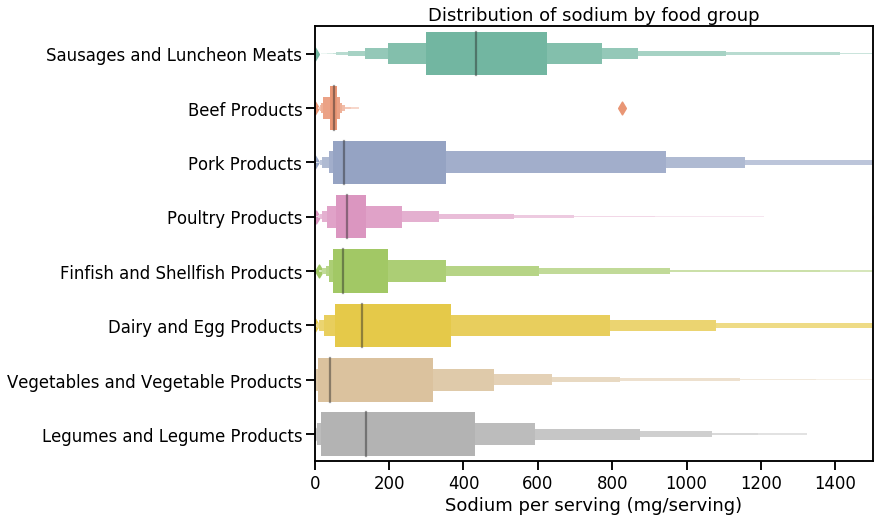

In [37]:
# Create new plot
fig, ax = plt.subplots(figsize=plot_attr['figsize'])
newplot = sns.boxenplot(y='FdGrp_Desc', x='Sodium_perserv', palette=plot_attr['palette'], 
                        ax=ax, order=food_groups, data=df_foodjoin_grps)

# Modify plot attributes
newax = ax.set(ylabel='', xlabel='Sodium per serving (mg/serving)', xlim=(0,1500),
               title='Distribution of sodium by food group')


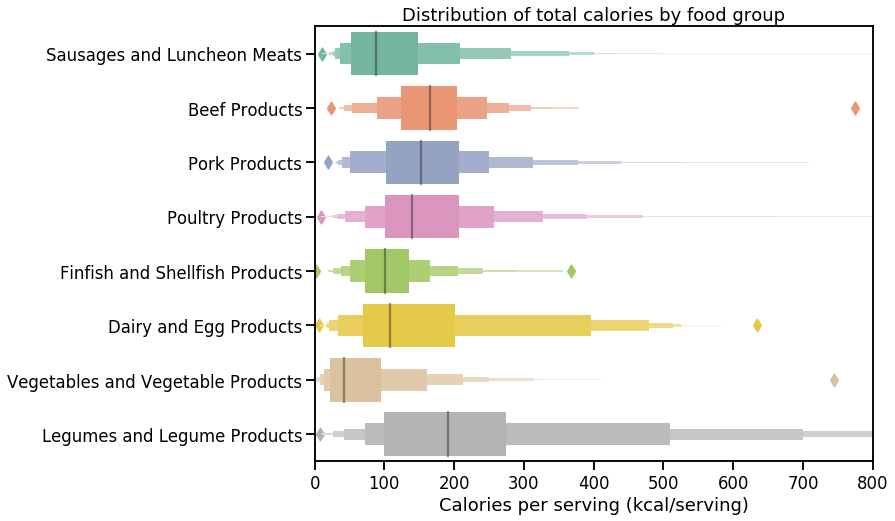

In [42]:
# Create new plot
fig, ax = plt.subplots(figsize=plot_attr['figsize'])
newplot = sns.boxenplot(y='FdGrp_Desc', x='Energ_Kcal_perserv', palette=plot_attr['palette'], 
                        ax=ax, order=food_groups, data=df_foodjoin_grps)

# Modify plot attributes
newax = ax.set(ylabel='', xlabel='Calories per serving (kcal/serving)', xlim=(0,800),
               title='Distribution of total calories by food group')
